# FIXED COUPON BOND YIELD AND RISK ANALYTICS
BLOOMBERG US TREASURY EXAMPLE

In [40]:
import sys
sys.path.append("..")
sys.path.append("..\\..")

In [41]:
from financepy.finutils.FinError import FinError
from financepy.finutils.FinFrequency import FinFrequencyTypes
from financepy.finutils.FinDayCount import FinDayCountTypes
from financepy.finutils.FinDate import FinDate
from financepy.products.bonds.FinBond import FinBond, FinYieldConventions

In [42]:
maturityDate = FinDate(15, 5, 2027)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [43]:
bond = FinBond(maturityDate, coupon, freqType, accrualType, face)

In [44]:
cleanPrice = 99.780842  # if face is 1 then this must be 0.99780842

You can get information about the bond using the print method.

In [45]:
bond.print()

Maturity Date: SAT 15 MAY 2027
Coupon: 0.02375
Frequency: FinFrequencyTypes.SEMI_ANNUAL
Accrual Type: FinDayCountTypes.ACT_ACT_ICMA
Face: 100.0


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [46]:
settlementDate = FinDate(21, 7, 2017)

In [47]:
bond.printFlows(settlementDate)

WED 15 NOV 2017 , 1.1875
TUE 15 MAY 2018 , 1.1875
THU 15 NOV 2018 , 1.1875
WED 15 MAY 2019 , 1.1875
FRI 15 NOV 2019 , 1.1875
FRI 15 MAY 2020 , 1.1875
SUN 15 NOV 2020 , 1.1875
SAT 15 MAY 2021 , 1.1875
MON 15 NOV 2021 , 1.1875
SUN 15 MAY 2022 , 1.1875
TUE 15 NOV 2022 , 1.1875
MON 15 MAY 2023 , 1.1875
WED 15 NOV 2023 , 1.1875
WED 15 MAY 2024 , 1.1875
FRI 15 NOV 2024 , 1.1875
THU 15 MAY 2025 , 1.1875
SAT 15 NOV 2025 , 1.1875
FRI 15 MAY 2026 , 1.1875
SUN 15 NOV 2026 , 1.1875
SAT 15 MAY 2027 , 101.1875


The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

Current yield is the coupon over the price

In [48]:
bond.currentYield(cleanPrice)*100

2.380216434734034

Yield to maturity using UK convention

In [49]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.UK_DMO)

0.02399999968488985

Yield to maturity using US Street convention

In [50]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.US_STREET)

0.02399999968488985

Yield to maturity using US Treasury convention

In [51]:
bond.yieldToMaturity(settlementDate, cleanPrice, FinYieldConventions.US_TREASURY)

0.02399810254873616

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [52]:
yieldConvention = FinYieldConventions.US_TREASURY

In [53]:
ytm = bond.yieldToMaturity(settlementDate, cleanPrice, yieldConvention)

Full price is the clean price plus accrued interest

In [54]:
print("Full Price = ", bond.fullPriceFromYield(settlementDate, ytm, yieldConvention))

Full Price =  100.21324689131528


In [55]:
print("Clean Price = ", bond.cleanPriceFromYield(settlementDate, ytm, yieldConvention))

Clean Price =  99.78084200001094


Accrued interest is accrued from previous coupon date to settlement date

In [56]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  MON 15 MAY 2017


In [57]:
print("Settlement date is ", settlementDate)

Settlement date is  FRI 21 JUL 2017


The amount of accrued interest is 

In [58]:
print("Accrued = ", bond._accrued)

Accrued =  0.4324048913043478


This is based on the following number of days of accrual

In [59]:
print("Accrued Days = ", bond._accruedDays)

Accrued Days =  67


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [60]:
duration = bond.dollarDuration(settlementDate, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  869.2156078895863


Modified Duration divides the dollar duration by the full price of the bond

In [61]:
modifiedDuration = bond.modifiedDuration(settlementDate, ytm, yieldConvention)
print("Modified Duration = ", modifiedDuration)

Modified Duration =  8.673659769075046


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [62]:
macauleyDuration = bond.macauleyDuration(settlementDate, ytm, yieldConvention)
print("Macauley Duration = ", macauleyDuration)

Macauley Duration =  8.777735457380603


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [63]:
conv = bond.convexityFromYield(settlementDate, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.8513814656357104


# Vectorisation of Functions

In [64]:
import numpy as np

In [32]:
ylds = np.linspace(-0.02,0.10,20)

In [65]:
prices = bond.fullPriceFromYield(settlementDate, ylds, yieldConvention)

In [66]:
import matplotlib.pyplot as plt

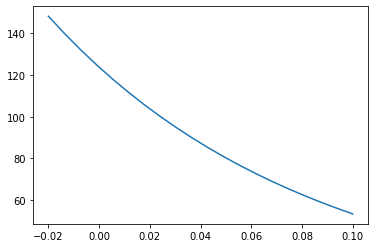

In [67]:
plt.plot(ylds,prices)

In [34]:
bond.dollarDuration(settlementDate, ylds, yieldConvention)

array([1347.16507095, 1264.06536911, 1186.39818492, 1113.7910246 ,
       1045.89805504,  982.39811798,  922.99289776,  867.40523035,
        815.37754233,  766.67040958,  721.061226  ,  678.34297369,
        638.32308655,  600.82239987,  565.67417923,  532.72322253,
        501.82502936,  472.84503251,  445.65788684,  420.14681102])

In [35]:
bond.modifiedDuration(settlementDate, ylds, yieldConvention)

array([9.09288017, 9.03465227, 8.97579794, 8.9163002 , 8.85614258,
       8.79530922, 8.73378489, 8.67155514, 8.60860629, 8.5449256 ,
       8.48050124, 8.41532249, 8.34937971, 8.28266451, 8.21516978,
       8.14688981, 8.07782034, 8.00795865, 7.93730366, 7.86585598])

In [36]:
bond.macauleyDuration(settlementDate, ylds, yieldConvention)

array([9.00195137, 8.97283623, 8.94272921, 8.91160741, 8.87944822,
       8.84622943, 8.81192928, 8.77652659, 8.74000081, 8.70233212,
       8.66350153, 8.62349099, 8.58228346, 8.53986304, 8.49621507,
       8.45132622, 8.40518464, 8.35778   , 8.30910367, 8.25914877])

In [37]:
bond.convexityFromYield(settlementDate, ylds, yieldConvention)

array([0.91851187, 0.90893473, 0.89934022, 0.88972675, 0.88009282,
       0.870437  , 0.86075804, 0.8510547 , 0.84132595, 0.83157086,
       0.82178858, 0.81197849, 0.80214008, 0.79227295, 0.78237694,
       0.77245201, 0.7624983 , 0.75251616, 0.74250607, 0.73246876])

In [38]:
cleanPrices = np.linspace(90.0,110,10)

In [39]:
bond.yieldToMaturity(settlementDate, cleanPrices, FinYieldConventions.UK_DMO)

array([0.03592432, 0.0330905 , 0.03033296, 0.02764783, 0.02503153,
       0.02248073, 0.01999233, 0.01756345, 0.0151914 , 0.01287366])